# Guide Project: Prison Break

In this project, we aim to:
- Obtain real data from the internet and prepare it for analysis
- Analyze the data using Python
- Author our first portfolio project in Jupyter Notebook, to share code and communicate results

## Helicopter Escapes!

We begin by importing some helper functions

In [1]:
from helper import *

## Get the Data

Now, let's get the data from the [List of helicopter prison escapes](https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes) Wikipedia article.

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes'
data = data_from_url(url)

Let's print the first three rows

In [3]:
for row in data[:3]:
    print(row)

['August 19, 1971', 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro', "Joel David Kaplan was a New York businessman who had been arrested for murder in 1962 in Mexico City and was incarcerated at the Santa Martha Acatitla prison in the Iztapalapa borough of Mexico City. Joel's sister, Judy Kaplan, arranged the means to help Kaplan escape, and on August 19, 1971, a helicopter landed in the prison yard. The guards mistakenly thought this was an official visit. In two minutes, Kaplan and his cellmate Carlos Antonio Contreras, a Venezuelan counterfeiter, were able to board the craft and were piloted away, before any shots were fired.[9] Both men were flown to Texas and then different planes flew Kaplan to California and Castro to Guatemala.[3] The Mexican government never initiated extradition proceedings against Kaplan.[9] The escape is told in a book, The 10-Second Jailbreak: The Helicopter Escape of Joel David Kaplan.[4] It also inspired the 

### Removing the Details

From the above we can see the data screen is mostly covered by the last element, the 'Details' column. Let's remove that.

In [4]:
index = 0
for row in data:
    data[index] = row[:-1]
    index += 1
print(data[:3])    

[['August 19, 1971', 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro'], ['October 31, 1973', 'Mountjoy Jail', 'Ireland', 'Yes', "JB O'Hagan Seamus TwomeyKevin Mallon"], ['May 24, 1978', 'United States Penitentiary, Marion', 'United States', 'No', 'Garrett Brock TrapnellMartin Joseph McNallyJames Kenneth Johnson']]


### Extracting the year

Now the 'Details' column is removed, it is much better to look at the data. Next we will modify the date column to only include the year.

In [5]:
for row in data:
    row[0] = fetch_year(row[0])
    
print(data[:3])

[[1971, 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro'], [1973, 'Mountjoy Jail', 'Ireland', 'Yes', "JB O'Hagan Seamus TwomeyKevin Mallon"], [1978, 'United States Penitentiary, Marion', 'United States', 'No', 'Garrett Brock TrapnellMartin Joseph McNallyJames Kenneth Johnson']]


### Attempts per Year I

Our next goal is to create a list of lists where the list has two elements:
 - A year
 - How many attempts occured in the corresponding year

In [6]:
# Determine min and max year in data
min_year = min(data, key=lambda x: x[0])[0]
max_year = max(data, key=lambda x: x[0])[0]

# Create list containing all years between (and including) min and max year
years = []
for y in range(min_year, max_year + 1):
    years.append(y)
    
print(years)

[1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]


In [7]:
# Create list of list for each year 
attempts_per_year = []

for year in years:
    attempts_per_year.append([year,0])
    
print(attempts_per_year)

[[1971, 0], [1972, 0], [1973, 0], [1974, 0], [1975, 0], [1976, 0], [1977, 0], [1978, 0], [1979, 0], [1980, 0], [1981, 0], [1982, 0], [1983, 0], [1984, 0], [1985, 0], [1986, 0], [1987, 0], [1988, 0], [1989, 0], [1990, 0], [1991, 0], [1992, 0], [1993, 0], [1994, 0], [1995, 0], [1996, 0], [1997, 0], [1998, 0], [1999, 0], [2000, 0], [2001, 0], [2002, 0], [2003, 0], [2004, 0], [2005, 0], [2006, 0], [2007, 0], [2008, 0], [2009, 0], [2010, 0], [2011, 0], [2012, 0], [2013, 0], [2014, 0], [2015, 0], [2016, 0], [2017, 0], [2018, 0], [2019, 0], [2020, 0]]


### Attempts per Year II

We now have a list of lists. Next we determine how many attempted were made in each year, and answer the following:

"In which year did the most attempts at breaking out of prison with a helicopter occur?"

In [8]:
# Determine how many attempts made in each year
for row in data:
    for ya in attempts_per_year:
        y = ya[0]
        if row[0] == y:
            ya[1] += 1

print(attempts_per_year)

[[1971, 1], [1972, 0], [1973, 1], [1974, 0], [1975, 0], [1976, 0], [1977, 0], [1978, 1], [1979, 0], [1980, 0], [1981, 2], [1982, 0], [1983, 1], [1984, 0], [1985, 2], [1986, 3], [1987, 1], [1988, 1], [1989, 2], [1990, 1], [1991, 1], [1992, 2], [1993, 1], [1994, 0], [1995, 0], [1996, 1], [1997, 1], [1998, 0], [1999, 1], [2000, 2], [2001, 3], [2002, 2], [2003, 1], [2004, 0], [2005, 2], [2006, 1], [2007, 3], [2008, 0], [2009, 3], [2010, 1], [2011, 0], [2012, 1], [2013, 2], [2014, 1], [2015, 0], [2016, 1], [2017, 0], [2018, 1], [2019, 0], [2020, 1]]


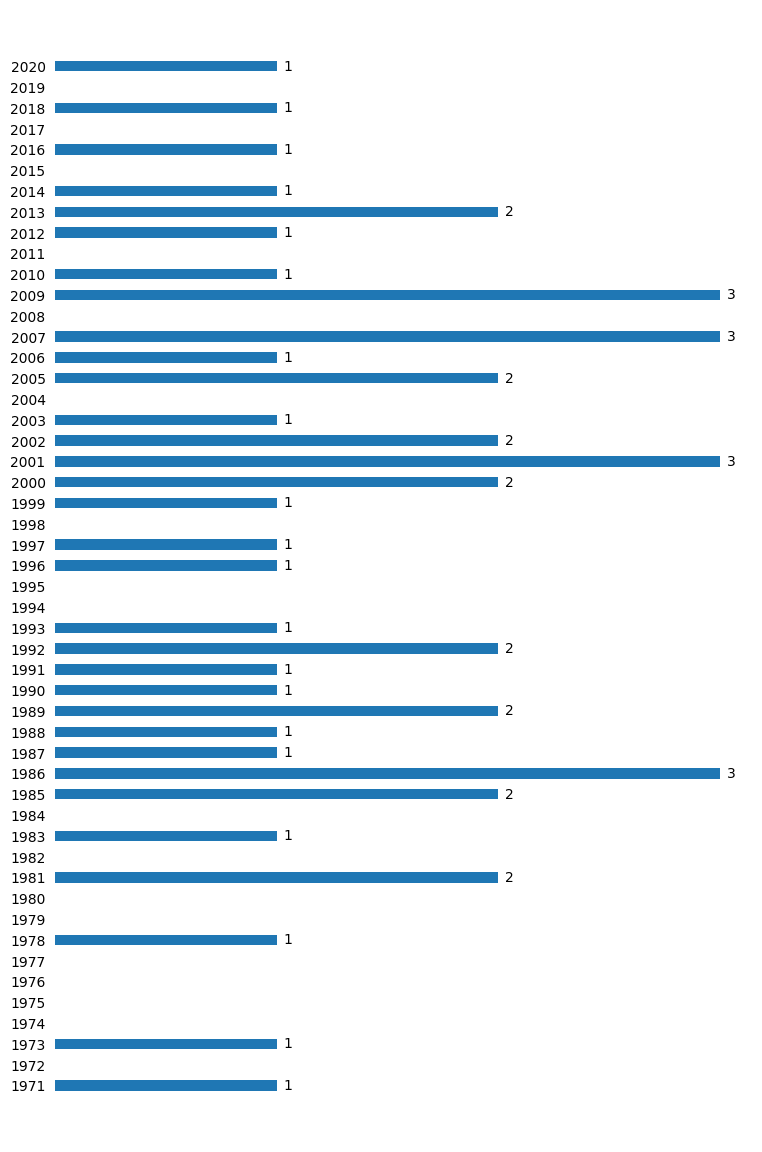

In [9]:
%matplotlib inline
barplot(attempts_per_year)

The most attempts at breaking out of prison with a helicopter occur in the years 1986, 2001, 207, 2009.

### Attempts by Country

Next up, we will answer the following:

"In which countries do the most attempted helicopter prison escapes occur?"

In [11]:
# Determine escape attempts by country.
countries_frequency = df["Country"].value_counts()
# Displaying the attempts by country using the helper function.
print_pretty_table(countries_frequency)

## Conclusion

In this project, we managed to import historical attempts of prison break using a helicopter from the web. We extracted the data into the required formate and analysed the data, and found most attempts at breaking out of prison with a helicopter occur in the years 1986, 2001, 207, 2009. We also found the most attempts made was in France, with a total of 15 times between the years 1971 and 2020.

To futher explore this project, the following could be a starting point:

- In which countries do helicopter prison breaks have a higher chance of success?
- How does the number of escapees affect the success?
- Which escapees have done it more than once?